# Tema 4: Métodos contemporáneos

Para ejecutar apropiadamente este notebook, debes tener instalados los siguientes paquetes:

`gym`

Además, debes asegurarte de descargar los siguientes paquetes de soporte:

`Utilidades_T4.py`

Si utilizas Google Colab, para instalar los paquetes, debe bastar con hacer:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Asegúrate de poner la ruta de tu carpeta de Drive

In [ ]:
# Esta debe ser una ruta en común
%cd drive/MyDrive
# Aquí viene tu ruta particular
%cd 6.8\ Reinforcement\ Learning\ \ \ Data\ Science\ Jr/0\ -\ Experto/Notebooks
%pwd

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/.shortcut-targets-by-id/1KDgMXJvr49d5x0phdBg5Sgrk7akf4y6y/6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks
[Errno 2] No such file or directory: '6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks'
/content/drive/.shortcut-targets-by-id/1KDgMXJvr49d5x0phdBg5Sgrk7akf4y6y/6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks


'/content/drive/.shortcut-targets-by-id/1KDgMXJvr49d5x0phdBg5Sgrk7akf4y6y/6.8 Reinforcement Learning   Data Science Jr/0 - Experto/Notebooks'

# 1. Introducción a Monte Carlo y OpenAI Gym
En esta primera sección revisaremos los primeros pasos a métodos de aproximación de Monte Carlo y el uso del bien conocido gimnasio de Aarendizaje por refuerzo.

## 1.1. Introducción a Monte Carlo: Aproximación de PI
En este caso implementamos un clásico ejemplo de uso de los métodos de Monte Carlo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Creamos la función correspondiente a la simulación

In [ ]:
def aproximacion_pi(num_dardos=1000):
    """
    Método para el cálculo de PI

    :param num_dardos: Cantidad de dardos o muestras a generar al azar.
    :return: La aproximación de PI, además de dos listas con coordenadas de los dardos que quedaron adentro y fuera del círculo.
    """

    # Inicialización
    dardos_en_circulo = [0]
    coord_dardos_adentro = []
    coord_dardos_afuera = []
    for _ in range(num_dardos):
        # Generamos la posición del dardo
        posicion = np.random.rand(2)

        # Determinamos si está adentro para incrementar el conteo
        if np.linalg.norm(posicion) < 1:
            incremento = 1
            coord_dardos_adentro.append(posicion)
        else:
            incremento = 0
            coord_dardos_afuera.append(posicion)

        dardos_en_circulo.append(dardos_en_circulo[-1]  + incremento)

    evolucion_valor = 4 * np.array(dardos_en_circulo[1:]) / (
            np.arange(num_dardos) + 1)

    return evolucion_valor, np.array(coord_dardos_adentro), np.array(coord_dardos_afuera)

Realizamos la simulación. Recuerda variar el valor de ``n`` para tener los datos que mostramos en el curso.

In [ ]:
n = 10000
np.random.seed(123)
pi_aprox, coord_adentro, coord_afuera = aproximacion_pi(n)

Ahora solamente graficamos los datos obtenidos a partir de la simualción.

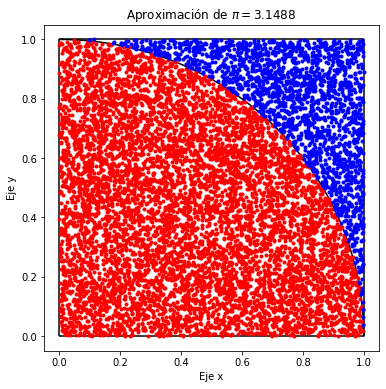

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

plt.hlines(0, 0, 1, 'k')
plt.hlines(1, 0, 1, 'k')
plt.vlines(0, 0, 1, 'k')
plt.vlines(1, 0, 1, 'k')

theta_values = np.linspace(0, np.pi/2, 100)
plt.plot(np.cos(theta_values), np.sin(theta_values), 'k')

plt.plot(coord_adentro[:,0], coord_adentro[:,1], 'r.')
plt.plot(coord_afuera[:,0], coord_afuera[:,1], 'b.')

plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title(f"Aproximación de $\\pi = {pi_aprox[-1]:.4f}$")

plt.show()

En esta última parte, graficamos información adicional de la simulación.

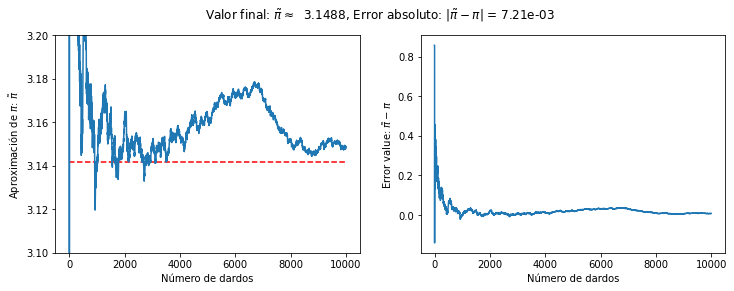

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(pi_aprox)
ax1.hlines(np.pi, xmin=0, xmax=n, colors='red', linestyles='--')
ax1.set_ylim(3.1, 3.2)
ax1.set_ylabel("Aproximación de $\\pi$: $\\tilde\\pi$")
ax1.set_xlabel("Número de dardos")

ax2.plot(pi_aprox - np.pi)
# ax2.set_ylim(-0.1, 0.1)
ax2.set_ylabel("Error value: $\\tilde\\pi - \\pi$")
ax2.set_xlabel("Número de dardos")

plt.suptitle(f"Valor final: $\\tilde\\pi \\approx$  {pi_aprox[-1]}, " +
             "Error absoluto: $\\vert\\tilde\\pi - \\pi\\vert$ = {:.2e}".format(
                 np.abs(pi_aprox[-1] - np.pi)
             ))
plt.show()

## 1.2. Introducción a OpenAI Gym
En esta primera parte, comenzaremos instalando e importando el gimnasio `gym` para implementaciones de reinforcement learning. Si ya lo tienes instalado, ignora esta parte.

In [ ]:
!pip install gym
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Usa la siguiente línea solo para no tener problemas al correr las simulaciones en COLAB

In [ ]:
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

Cargamos los paquetes en caso de que hayas ignorado la sección anterior.

In [ ]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: ignored

Ahora verificamos los mapas por defecto que trae FrozenLake

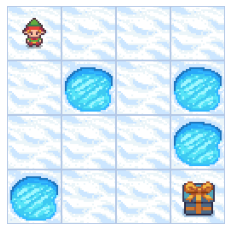

In [ ]:
# Mapa 1
entorno = gym.make('FrozenLake-v1')
entorno.reset()
uti.mostrar(entorno)

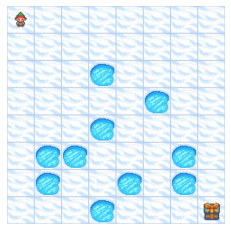

In [ ]:
# Mapa 2
entorno = gym.make('FrozenLake8x8')
entorno.reset()
uti.mostrar(entorno)

Ahora probamos el entorno tratando de replicar el problema que utilizamos en el tema anterior: Xolo y su camino al Mictlán.

Debes tener en cuenta que el espacio de acción en este caso es:
* 0: Izquierda
* 1: Abajo
* 2: Derecha
* 3: Arriba

El tamaño del entorno está dado por el número de filas y columnas, mientras que las recompensas son: +1 por alcanzar la meta (G), 0 por caer en un hueco (H) o estar en una celda helada (F).

Con estas letras que hemos marcado en mayúsculas, es posible personalizar el mapa, tal como haremos a continuación.

Además, si la opción `is_slippery` está activada, el agente tendrá la inoportuna posibilidad de continuar su movimiento por efectos del deslizamiento. Estas probabilidades se calculan utilizando una distribución uniforme. Por ejemplo, si el agente viende de la derecha hacia una celda de su izquierda, éste puede terminar en una celda más a la izquierda, arriba o abajo.

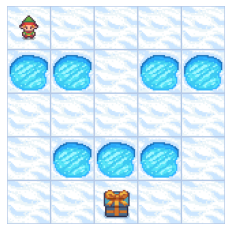

In [ ]:
# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando
mapa = [
    'SFFFF',
    'HHFHH',
    'FFFFF',
    'FHHHF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

# Definimos el entorno para la simulación
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)
entorno.reset()
uti.mostrar(entorno)

En caso de que no estés usando la función `uti.show_env()` y en su lugar `env.render()`, es probable que requieras aplicar la siguiente línea:

In [ ]:
entorno.close()

Ahora creemos una política cualquiera para ver cómo usar el gimnasio

In [ ]:
# Creación de la política inicial
politica = [(s + 1) % 4 for s in range(25)]

# Evaluación de la política en el entorno
print("Tasa de éxito de la política inicial: {:.1f}%".format(
    uti.implementar_politica(entorno, politica) * 100))

NameError: ignored

Como era de esperarse, no es muy buena esta política inicial. La utilizamos para que conocieras esta función del conjunto de utilidades disponibles.

Ahora continuemos con la caracterización del entorno. La base principal de la programación dinámica. Aquí, como estamos simulando un entorno parecido a uno práctico, debemos realizar varios procedimientos para poder caracterizarlo, o sea, conocer su matriz de transiciones y recompensas. Esto es lo que asumiremos como desconocido cuando comencemos a trabajar en Monte Carlo.

In [ ]:
# Caracterizamos el entorno: probabilidades de transición y recompensa
prob_trans, recompensa = uti.caracterizar_entorno(entorno)

NameError: ignored

## 1.3. Iteración de Política
Ahora implementamos las funciones que nos ayudarán a replicar más o menos el ejemplo del Xolo y Mictlán.

Primero definimos una política inicial para cada estado de los 25 posibles, recuerda que los valores aquí corresponden a las acciones que listamos antes.

Luego, evaluamos esta política en el entorno que hemos creado. Puedes ver este módulo en los archivos adjuntos.

Es momento de implementar el método que ya conocemos, el de Iteración de Política, que vimos como un método bastante pesado en algunos casos cuando el entorno es muy grande. Te recomiendo revisar el método en el módulo de utilidades.

Para ello utilizamos 50 iteraciones y evaluamos su tasa de éxito final.
Como resultado, obtenemos una tasa de éxito del 100%.

*Si este valor no es así, debes volver a correr la simulación.

In [14]:
# Iteración de Política
pi_politica, pi_exito = uti.iteracion_politica(
    entorno, prob_trans, recompensa, max_itr=60)
print("Tasa de éxito de pi_*: {:.1f}%".format(pi_exito[-1] * 100))

NameError: ignored

Ahora graficamos cómo evoluciona esta tasa de éxito. Como te puedes dar cuenta, esta cambia rápido. Esto se debe a la naturaleza misma del método que estamos implementando. ¿Recuerdas lo que vimos en el tema anterior?

In [15]:
# Gráfica de la tasa de éxito
plt.plot(pi_exito)
plt.title("Tasa de éxito promedio v.s. Episodio (Iteración de Política)")
plt.show()

NameError: ignored

Ahora veamos cómo es la política óptima utilizando este método de programación dinámica. En este caso, he reemplazado las acciones por flechas a manera de hacerlo más fácil de visualizar. Si el duende comienza en el extremo superior izquierdo, es muy sencillo seguir las acciones que toma por cada estado.

In [ ]:
acciones = {0:'←', 1:'↓', 2:'→', 3:'↑'}
np.array([acciones[p] for p in pi_politica]).reshape(dimensiones)

Ahora veamos cómo el duende utiliza esta política óptima para llegar al tesoro. Ten presente que en este caso, incluso, podrías cambiar el lugar de inicio. Sin embargo, debes tener en cuenta que en este caso estamos aproximando la caracterización del sistema, por lo que pueden haber políticas no óptimas pero que llevarán al duende a su meta.

In [ ]:
# Máximo número de iteraciones

# Volvemos a cargar el entorno, ya que conocemos una política
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)

# Le proporcionamos esa política al agente como carta de navegación
uti.ejecutar_juego(entorno, pi_politica, 100, wait=0.1)

In [ ]:
# Cerramos voluntariamente la simulaicón
entorno.close()

## 1.4. Iteración de Valor
Continuemos con el algoritmo de iteración de valor, que sabemos, es mucho más rápido y práctico para escenarios complicados, sin perder las bondades de la programación dinámica.

Primero, repitamos el procedimiento de caracterizar el entorno.

In [ ]:
# Generación del entorno con base en el mapa
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)
estado = entorno.reset()

# Caracterización del entorno
prob_trans, recompensa = uti.caracterizar_entorno(entorno)

NameError: ignored

Continuamos con la implementación del algoritmo, que en este caso, ya sabes que consiste de una evaluación de la política seguida de una mejora en ella, y así sucesivamente hasta llegar a políticas y valores estables.

In [ ]:
# Implementamos el método de iteración de valor
pi_politica, pi_exito = uti.iteracion_valor(
    entorno, prob_trans, recompensa, max_itr=50)
print("Tasa de éxito de pi_*: {:.1f}%".format(pi_exito[-1] * 100))

NameError: ignored

Ahora graficamos la evolución de este procedimiento. ¿Qué puedes comentar acerca de esta implementación?

In [ ]:
plt.plot(pi_exito)
plt.title("Tasa de éxito promedio v.s. Episodio (Iteración de Política)")
plt.show()

Observamos la política óptima resultante

In [ ]:
acciones = {0:'←', 1:'↓', 2:'→', 3:'↑'}
np.array([acciones[p] for p in pi_politica]).reshape((5,5))

In [ ]:
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)
uti.ejecutar_juego(entorno, pi_politica, 100, 0.1)

# 2. Métodos de Monte Carlo (On-Policy) basados en Política
En esta sección veremos los métodos basasdos en política

## 2.1. Métodos de Predicción de la Primera Visita

In [16]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: ignored

In [17]:
# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando.
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

# Definimos el entorno para la simulación
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
entorno.reset()
uti.mostrar(entorno)

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


NameError: ignored

Hemos activado:``is_slippery = True`` para agregar aleatoriedad a la simulación. De lo contrario, no estaremos encontrando información suficiente para determinar un retorno promedio.

Luego de esto, continuamos definiendo una polítca aleatoria a seguir durante la etapa de evaluación con base en la primera visita.

In [ ]:
politica = uti.crear_politica_aleatoria_estado(entorno)
uti.plot_policy(politica, dimensiones)

Ahora procedemos a implementar el método de Monte Carlo de predicción de la primera visita.

In [ ]:
def mc_first_visit_prediction(env, policy, gamma=0.99, num_episodes=5000):
    """
    Implementación del método de Monte Carlo de predicción de la primera visita.

    :param env: Entorno de OpenAI Gym
    :param policy: Política a evaluar
    :param gamma: Factor de descuento
    :param num_episodes: Número de episodios
    :return: Función de Estado-Valor
    """

    # Inicializamos el retorno y la función de estado-valor
    returns = {s: [] for s in range(env.observation_space.n)}

    value_per_state = uti.valor_inicial(env)
    values = {s: value_per_state[s] for s in range(env.observation_space.n)}

    # Realizamos tantos ciclos como episodios hayamos especificado
    for _ in range(num_episodes):
        # Inicializamos el valor acumulado de recompensas con descuento y otros
        G = 0

        # Bandera que nos indica si el agente ha llegado a un estado terminal
        done = False

        # Trayectoria seguida por nuestro agente durante el episodio
        episode = []

        # Comenzamos con el estado inicial
        state = env.reset()

        # Generamos el episodio desde el inicio hasta un estado terminal
        while not done:
            # Evaluamos la política
            action = policy[state]

            # Aplicamos la acción correspondiente y obtenemos el nuevo estado y recompensa
            next_state, reward, done, _ = env.step(action)

            # Guardamos estado, acción y recompensa en el episodio actual
            episode.append((state, action, reward))

            # Reemplazamos el estado actual con el estado siguiente para continuar
            state = next_state

        # Recorremos cada uno de los pasos del episodio actual
        for ind, sar in enumerate(episode[::-1]):
            # Extraemos la información del estado, acción y recompensa
            state, action, reward = sar

            # Calculamos la recomensa acumulada con descuento
            G = gamma * G + reward

            # Si el estado acutal corresponde a la primera visita...
            if state not in np.array(episode[::-1])[:,0][ind + 1:]:
                # Agregar el valor de G a la lista de retornos
                returns[state].append(G)

                # Calcular el estado-valor como el promedio de la lista de retornos
                values[state] = np.mean(returns[state])

    return values

In [ ]:
np.random.seed(123)
state_values = mc_first_visit_prediction(entorno, politica, gamma=0.99, num_episodes=5000)

In [ ]:
uti.plot_state_value_grid(state_values, dimensiones)

## 2.2. Métodos con Inicios de Exploración

In [22]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando.
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

ModuleNotFoundError: ignored

In [23]:
# Definimos el entorno para la simulación
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)

In [24]:
def mc_exploring_stars(env, gamma=0.99, num_episodes=4000):
    returns = {(state, action): []
               for state in range(env.observation_space.n)
               for action in range(env.action_space.n)}

    value_per_state = uti.valor_inicial(env)
    Q = {(state, action): value_per_state[state]
         for state in range(env.observation_space.n)
         for action in range(env.action_space.n)}
    policy = uti.crear_politica_aleatoria_estado(env)

    for _ in range(num_episodes):
        G = 0
        done = False
        episode = []

        # Generate a trajectory
        state = env.reset()
        while not done:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        for ind, sar in enumerate(episode[::-1]):
            state, action, reward = sar
            G = gamma * G + reward

            if state not in np.array(episode[::-1])[:,0][ind + 1:]:
                pair = (state, action)
                returns[pair].append(G)
                Q[pair] = np.mean(returns[pair])

                Q_list = [Q[(state, act)] for act in range(env.action_space.n)]
                policy[state] = np.argmax(Q_list)

    return Q, policy

In [25]:
np.random.seed(123)
Q, politica = mc_exploring_stars(entorno, gamma=0.99, num_episodes=5000)
uti.plot_action_value_grid(Q, dimensiones)

NameError: ignored

In [ ]:
# pi = lambda state: np.argmax([Q[(state, act)] for act in range(entorno.action_space.n)])
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
uti.ejecutar_juego(entorno, politica, 100, 0.1)

In [ ]:
entorno.close()

## 2.3. Métodos (epsilon-greedy) sin Inicios de Exploración


In [ ]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando.
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

In [ ]:
def mc_epsilon_soft(env, policy=None, epsilon=0.01, gamma=0.99, num_episodes=1000):
    policy = uti.crear_politica_aleatoria_estado_accion(env) if not policy else policy
    returns = {(state, action): []
               for state in range(env.observation_space.n)
               for action in range(env.action_space.n)}

    value_per_state = uti.valor_inicial(env)
    Q = {(state, action): value_per_state[state]
         for state in range(env.observation_space.n)
         for action in range(env.action_space.n)}

    for _ in range(num_episodes):
        G = 0
        done = False
        episode = []

        # Generate a trajectory
        state = env.reset()
        while not done:
            threshold = random.uniform(0, sum(policy[state].values()))
            cum_sum = 0
            for act_key, act_prob in policy[state].items():
                cum_sum += act_prob
                if cum_sum > threshold:
                    action = act_key
                    break
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        for ind, sar in enumerate(episode[::-1]):
            state, action, reward = sar
            G = gamma * G + reward

            if state not in np.array(episode[::-1])[:,0][ind + 1:]:
                pair = (state, action)
                returns[pair].append(G)
                Q[pair] = np.mean(returns[pair])

                Q_list = [Q[(state, act)] for act in range(env.action_space.n)]
                indices = [ind for ind, x in enumerate(Q_list) if x == max(Q_list)]
                A_star = random.choice(indices)

                probs = policy[state].values()
                for action, prob in policy[state].items():
                    policy[state][action] = epsilon / abs(sum(probs))
                    if action == A_star:
                        policy[state][action] += 1 - epsilon

    return Q, policy

In [ ]:
np.random.seed(123)
# Definimos el entorno para la simulación
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
Q, politica = mc_epsilon_soft(entorno, policy=None, epsilon=0.2, gamma=0.99,
                              num_episodes=5000)
uti.plot_action_value_grid(Q, dimensiones)

In [ ]:
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
uti.ejecutar_juego(entorno, politica, 100)

In [ ]:
entorno.close()

# 3. Métodos de Monte Carlo (Off-Policy) fuera de la Política

## 2.4. Métodos de Predicción de Muestreo por Importancia (Importance Sampling)

In [26]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando.
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

ModuleNotFoundError: ignored

In [27]:
def mc_offpolicy_prediction(env, target_policy=None, gamma=0.99, epsilon=0.01, num_episodes=1000):
    target_policy = uti.crear_politica_aleatoria_estado_accion(env) if not target_policy else target_policy
    behavior_policy = lambda: env.action_space.sample()

    C = {(state, action): 0
               for state in range(env.observation_space.n)
               for action in range(env.action_space.n)}
    value_per_state = uti.valor_inicial(env)
    Q = {(state, action): value_per_state[state]
         for state in range(env.observation_space.n)
         for action in range(env.action_space.n)}

    for _ in range(num_episodes):
        done = False
        W = 1
        G = 0
        episode = []

        # Generate a trajectory
        state = env.reset()
        while not done:
            action = behavior_policy()
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        for ind, sar in enumerate(episode[::-1]):
            state, action, reward = sar
            G = gamma * G + reward

            pair = (state, action)

            # Calculate the average return for the state
            C[pair] += W
            Q[pair] += (W / C[pair]) * (G - Q[pair])

            Q_list = [Q[(state, act)] for act in range(env.action_space.n)]
            indices = [ind for ind, x in enumerate(Q_list) if x == max(Q_list)]
            A_star = random.choice(indices)

            probs = target_policy[state].values()
            for action, prob in target_policy[state].items():
                target_policy[state][action] = epsilon / abs(sum(probs))
                if action == A_star:
                    target_policy[state][action] += 1 - epsilon

            W *= target_policy[state][action] / 0.25

            if W == 0:
                break

    return Q, target_policy

In [30]:
# Definimos el entorno para la simulación
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)

In [29]:
np.random.seed(123)
Q, politica = mc_offpolicy_prediction(entorno, target_policy=None, epsilon=0.2, gamma=0.99, num_episodes=15000)
uti.plot_action_value_grid(Q, dimensiones)

NameError: ignored

In [ ]:
entorno = gym.make('FrozenLake-v1',
                   desc=mapa, is_slippery=False)
# uti.ejecutar_juego(entorno, politica, 100)
uti.ejecutar_juego(entorno, politica, 100, 0.1)


In [ ]:
entorno.close()

## 2.5. Métodos de Control

In [ ]:
import gym
import Utilidades_T4 as uti
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# Aquí diseñamos el mapa para que se parezca al ejemplo que hemos venido utilizando.
mapa = [
    'SFFFF',
    'FFFFF',
    'FFFHF',
    'FFFFF',
    'FFGFF'
]
dimensiones = (len(mapa), len(mapa[0]))

In [ ]:
def mc_offpolicy_control(env, gamma=0.99, epsilon=0.01, num_episodes=1000):
    C = {(state, action): 0
               for state in range(env.observation_space.n)
               for action in range(env.action_space.n)}
    value_per_state = uti.valor_inicial(env)
    Q = {(state, action): value_per_state[state]
         for state in range(env.observation_space.n)
         for action in range(env.action_space.n)}

    target_policy = {state: np.argmax([Q[(state, action)] for action in range(env.action_space.n)]) for state in range(env.observation_space.n)}

    behavior_policy = lambda: env.action_space.sample()

    for _ in range(num_episodes):
        done = False
        G = 0.0
        W = 1.0
        episode = []

        # Generate a trajectory
        state = env.reset()
        while not done:
            action = behavior_policy()
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            state = next_state

        # States visited in the episode
        # pairs_visited = set([(x[0], x[1]) for x in episode])
        for state, action, reward in episode[::-1]:
            pair = (state, action)

            # Sum all rewards since the first occurrence
            G = gamma * G + reward

            # Calculate the average return for the state
            C[pair] += W
            Q[pair] += W * (G - Q[pair]) / C[pair]

            # target_policy[state] = np.argmax(
            #     [Q[(state, act)] for act in range(env.action_space.n)]
            # )
            Q_list = [Q[(state, act)] for act in range(env.action_space.n)]
            indices = [ind for ind, x in enumerate(Q_list) if x == max(Q_list)]
            target_policy[state] = random.choice(indices)

            if target_policy[state] != action:
                break

            W *= 1 / 0.25

    return Q, target_policy

In [ ]:
# Definimos el entorno para la simulación
np.random.seed(123)
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=False)
Q, politica = mc_offpolicy_control(entorno, gamma=0.99, epsilon=0.05, num_episodes=20000)
uti.plot_action_value_grid(Q, dimensiones)

In [ ]:
entorno = gym.make('FrozenLake-v1', desc=mapa, is_slippery=True)
uti.ejecutar_juego(entorno, politica, 100)

In [ ]:
entorno.close()